# House Pricing Data
## by Moaaz Mahmoud, Marko Barsoum, and AbdElRahman Yasser

## Overview
> In this project, we are to perform the whole data analysis process on a dataset. In particular, we will go through the following phases:
> - Data Loading
> - Data Cleaning
> - Exploratory Data Analysis
> - Explanatory Data Analysis
### Dataset Description
> This dataset, from Kaggle, contains data about houses. The dataset contains 1259 rows, each representing an observation about a house sale. The dataset contains 81 columns, each representing a fact about that sale, like the sale price, the lot area of the house, the overall quality of the materials used in finishing that house, ...etc

### Importing Libraries

In [1]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 1. Data Loading

The first step when working with data is to "bring" it to the working environment. In our case we have our data stored in a csv file, called dataset.csv. For this we use a pandas `dataframe` object.

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


It's useful to print out some information about the data before getting started with the actual proccessing/analysis. We use the methods `info` and `describe` for that.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Data Cleaning

## 2.1. Filtering Columns

In [5]:
for i, x in enumerate(df.columns):
    print(f'{i} {x}')

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 Alley
7 LotShape
8 LandContour
9 Utilities
10 LotConfig
11 LandSlope
12 Neighborhood
13 Condition1
14 Condition2
15 BldgType
16 HouseStyle
17 OverallQual
18 OverallCond
19 YearBuilt
20 YearRemodAdd
21 RoofStyle
22 RoofMatl
23 Exterior1st
24 Exterior2nd
25 MasVnrType
26 MasVnrArea
27 ExterQual
28 ExterCond
29 Foundation
30 BsmtQual
31 BsmtCond
32 BsmtExposure
33 BsmtFinType1
34 BsmtFinSF1
35 BsmtFinType2
36 BsmtFinSF2
37 BsmtUnfSF
38 TotalBsmtSF
39 Heating
40 HeatingQC
41 CentralAir
42 Electrical
43 1stFlrSF
44 2ndFlrSF
45 LowQualFinSF
46 GrLivArea
47 BsmtFullBath
48 BsmtHalfBath
49 FullBath
50 HalfBath
51 BedroomAbvGr
52 KitchenAbvGr
53 KitchenQual
54 TotRmsAbvGrd
55 Functional
56 Fireplaces
57 FireplaceQu
58 GarageType
59 GarageYrBlt
60 GarageFinish
61 GarageCars
62 GarageArea
63 GarageQual
64 GarageCond
65 PavedDrive
66 WoodDeckSF
67 OpenPorchSF
68 EnclosedPorch
69 3SsnPorch
70 ScreenPorch
71 PoolArea
72 PoolQC
73 Fence


In [6]:
df = df[df.columns[[4, 7, 21, 62, 79, 77, 39, 40, 41, 32, 17, 80]]]
df.head()

,LotArea,LotShape,RoofStyle,GarageArea,SaleCondition,YrSold,Heating,HeatingQC,CentralAir,BsmtExposure,OverallQual,SalePrice
0,8450,Reg,Gable,548,Normal,2008,GasA,Ex,Y,No,7,208500
1,9600,Reg,Gable,460,Normal,2007,GasA,Ex,Y,Gd,6,181500
2,11250,IR1,Gable,608,Normal,2008,GasA,Ex,Y,Mn,7,223500
3,9550,IR1,Gable,642,Abnorml,2006,GasA,Gd,Y,No,7,140000
4,14260,IR1,Gable,836,Normal,2008,GasA,Ex,Y,Av,8,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1259 non-null   int64 
 1   LotShape       1259 non-null   object
 2   RoofStyle      1259 non-null   object
 3   GarageArea     1259 non-null   int64 
 4   SaleCondition  1259 non-null   object
 5   YrSold         1259 non-null   int64 
 6   Heating        1259 non-null   object
 7   HeatingQC      1259 non-null   object
 8   CentralAir     1259 non-null   object
 9   BsmtExposure   1223 non-null   object
 10  OverallQual    1259 non-null   int64 
 11  SalePrice      1259 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 118.2+ KB


## 2.2. Removing Duplicates

In [8]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1259 non-null   int64 
 1   LotShape       1259 non-null   object
 2   RoofStyle      1259 non-null   object
 3   GarageArea     1259 non-null   int64 
 4   SaleCondition  1259 non-null   object
 5   YrSold         1259 non-null   int64 
 6   Heating        1259 non-null   object
 7   HeatingQC      1259 non-null   object
 8   CentralAir     1259 non-null   object
 9   BsmtExposure   1223 non-null   object
 10  OverallQual    1259 non-null   int64 
 11  SalePrice      1259 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 127.9+ KB


## 2.3. Handling Missing Data

In [9]:
df = df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1223 non-null   int64 
 1   LotShape       1223 non-null   object
 2   RoofStyle      1223 non-null   object
 3   GarageArea     1223 non-null   int64 
 4   SaleCondition  1223 non-null   object
 5   YrSold         1223 non-null   int64 
 6   Heating        1223 non-null   object
 7   HeatingQC      1223 non-null   object
 8   CentralAir     1223 non-null   object
 9   BsmtExposure   1223 non-null   object
 10  OverallQual    1223 non-null   int64 
 11  SalePrice      1223 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 124.2+ KB


## 2.4. Handling Outliers

### 2.4.1. Outliers in Quantitative Data

In order to detect outliers in quantitative data, we will plot some histograms for the columns with quantitative values.

''

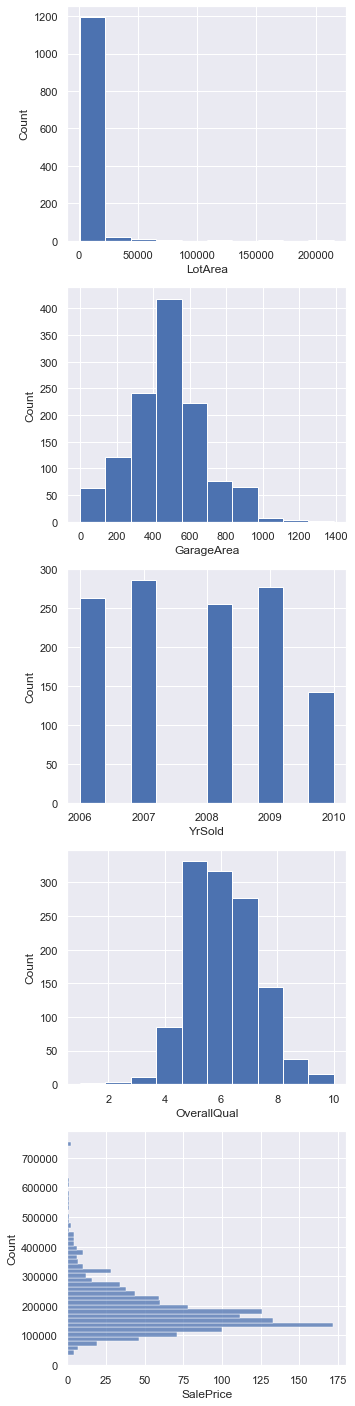

In [10]:
plt.figure(figsize=(5, 25))
for plot_idx, col_idx in enumerate([0, 3, 5, 10]):
    plt.subplot(5, 1, plot_idx+1)
    plt.hist(data=df, x=df.columns[col_idx])
    plt.xlabel(df.columns[col_idx])
    plt.ylabel('Count')
plt.subplot(5, 1, 5)
sns.histplot(data=df, y=df.columns[11])     # Plotted horizontally to enhance the clarity
plt.xlabel(df.columns[11])
plt.ylabel('Count')
;

For the 'LotArea' and 'SalePrice' columns, we will repeat the plots in order to make a decision with handling the outliers. For 'LotArea', we will plot with the x-axis limits set to 0 and 50,000. And for 'SalePrice', we will plot with the y-axis limits set to 0 and 500,000.

(0.0, 50000.0)

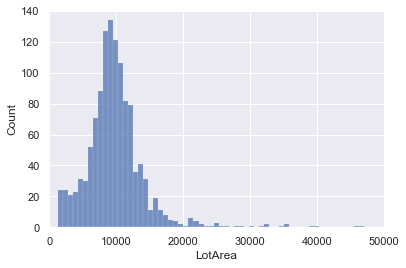

In [11]:
sns.histplot(data=df, x=df.columns[0])
plt.xlim(0, 50e3)

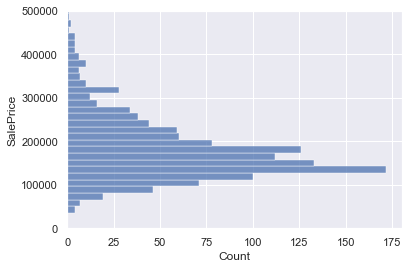

In [12]:
sns.histplot(data=df, y=df.columns[11])
plt.ylim(0, 500e3);

For 'LotArea', we will keep the values not exceeding 25,000 and for 'SalePrice', we will keep the values not exceeding 480,000.

In [13]:
df = df.query('LotArea <= 25000')
df = df.query('SalePrice <= 480000')

In [14]:
df.describe()

,LotArea,GarageArea,YrSold,OverallQual,SalePrice
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,9489.096720,468.622372,2007.796468,6.123633,178568.864592
std,3569.416453,208.003313,1.321521,1.326633,70618.391158
min,1300.000000,0.000000,2006.000000,1.000000,34900.000000
25%,7560.000000,326.000000,2007.000000,5.000000,130250.000000
50%,9353.000000,474.000000,2008.000000,6.000000,163900.000000
75%,11362.000000,576.000000,2009.000000,7.000000,212000.000000
max,25000.000000,1390.000000,2010.000000,10.000000,475000.000000


### 2.4.2. Outliers in Categorical Data

For categorical data, we will look closely at the frequencies of values in every category and remove the rows having their values extremely low. Suppose we have 100,000 rows with property x set to A, 120,000 with property x set to B, and 3 having their x-property set to C. In this case we will remove the C rows.

In [15]:
for col in df.columns[[1, 2, 4, 6, 7, 8, 9]]:   # Excluding [0, 3, 5, 10, 11]
    print(df[col].value_counts())

Reg    755
IR1    401
IR2     28
IR3      5
Name: LotShape, dtype: int64
Gable      948
Hip        219
Gambrel      9
Mansard      6
Flat         6
Shed         1
Name: RoofStyle, dtype: int64
Normal     970
Partial    103
Abnorml     88
Family      18
Alloca       7
AdjLand      3
Name: SaleCondition, dtype: int64
GasA    1170
GasW      13
Grav       5
OthW       1
Name: Heating, dtype: int64
Ex    606
TA    351
Gd    198
Fa     33
Po      1
Name: HeatingQC, dtype: int64
Y    1120
N      69
Name: CentralAir, dtype: int64
No    810
Av    183
Mn    100
Gd     96
Name: BsmtExposure, dtype: int64


In [16]:
df = df.query('LotShape != "IR3"')
df = df.query('RoofStyle == "Gable" | RoofStyle == "Hip"')
df = df.query('(SaleCondition != "AdjLand") & (SaleCondition != "Alloca")')
df = df.query('Heating != "Po"')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1154 non-null   int64 
 1   LotShape       1154 non-null   object
 2   RoofStyle      1154 non-null   object
 3   GarageArea     1154 non-null   int64 
 4   SaleCondition  1154 non-null   object
 5   YrSold         1154 non-null   int64 
 6   Heating        1154 non-null   object
 7   HeatingQC      1154 non-null   object
 8   CentralAir     1154 non-null   object
 9   BsmtExposure   1154 non-null   object
 10  OverallQual    1154 non-null   int64 
 11  SalePrice      1154 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 117.2+ KB


# 3. Exploratory Data Analysis

### Hypothesis
> Up till now, we have 1154 rows and 12 columns in the dataset, namely:
> - LotArea
> - LotShape
> - RoofStyle
> - GarageArea
> - SaleCondition
> - YrSold
> - Heating
> - HeatingQC
> - CentralAir
> - BsmtExposure
> - OverallQual
> - SalePrice
>
> Among those columns, 5 have numeric data, and 7 have categorical data.
>
> The variable of main interest is the 'SalePrice' and our hypothesis is that it's most highly dependent on those variables:
> - LotArea
> - HeatingQC
> - CentralAir
> - OverallQual

## 3.1. Univariate Exploration

We will begin our investigation with displaying the distribution of the variable of main interest — SalePrice.

''

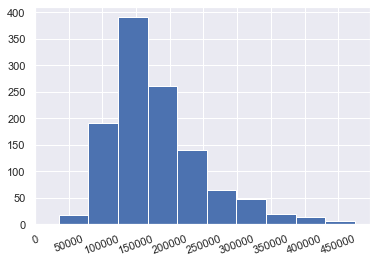

In [18]:
plt.hist(data=df, x='SalePrice')
plt.xticks(np.arange(0, 500e3, 50e3), rotation=20)
;

We will create two `Index` objects, one for numeric (quantitative) data, and the other for categorical data. We will make use of them frequently later.

In [19]:
# For numeric data
numeric_columns = df.columns[[0, 3, 5, 10, 11]]
# For categorical data
categorical_columns = df.columns[[1, 2, 4, 6, 7, 8, 9]]

### 3.1.1. Numeric Data Distributions

''

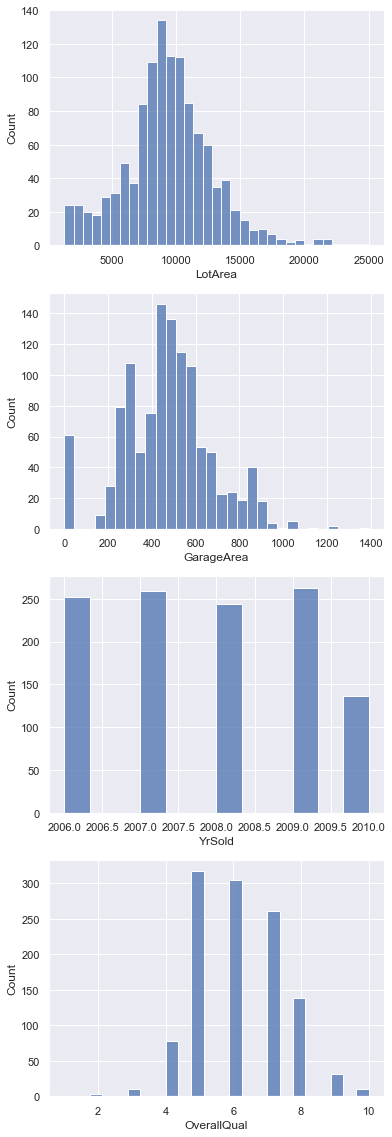

In [20]:
plt.figure(figsize=(6, 5*4))

i = 1
for col in numeric_columns[:-1]:
    plt.subplot(4, 1, i); i+=1
    sns.histplot(data=df, x=col)
    plt.xlabel(col)
;

### 3.1.2. Categorical Data Distributions

''

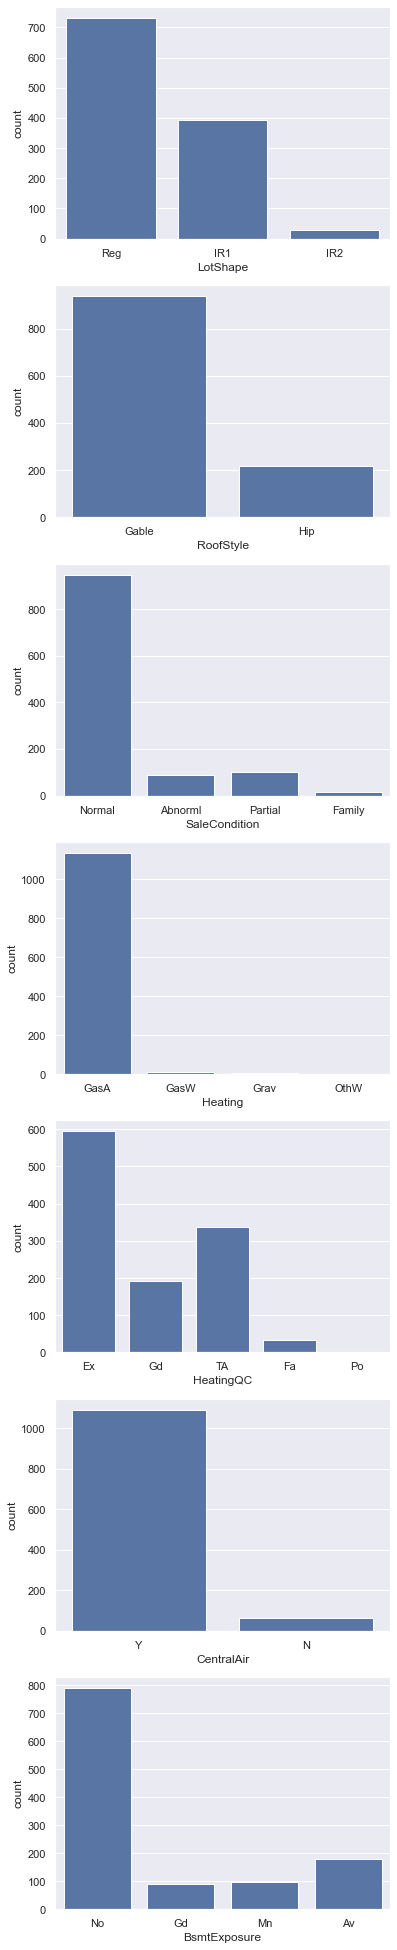

In [21]:
plt.figure(figsize=(6, 5*7))

i = 1
for col in categorical_columns:
    plt.subplot(7, 1, i); i+=1
    sns.countplot(data=df, x=col, color=sns.color_palette()[0])
    plt.xlabel(col)
;

## 3.2. Bivariate Exploration

### 3.2.1. Plots Involving Numeric Data

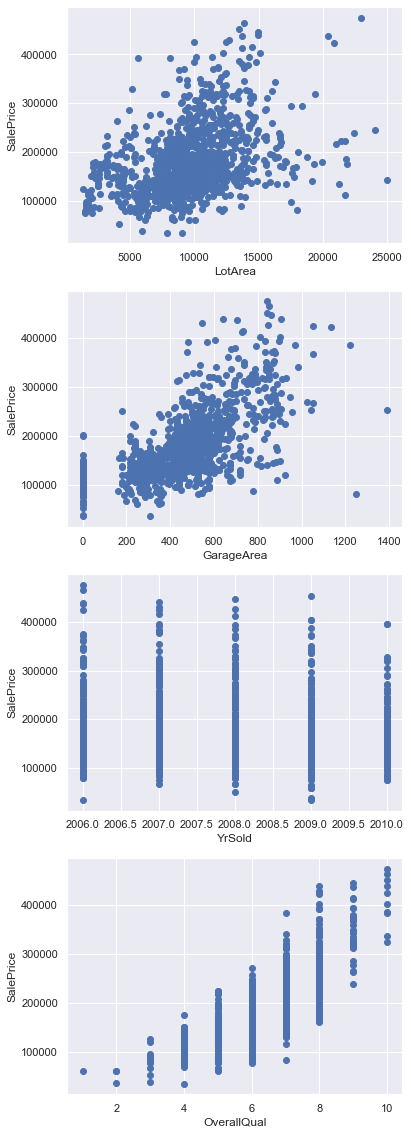

In [22]:
plt.figure(figsize=(6, 20))
i=1
for col in df.columns[:11]:
    if df.dtypes[col] != 'object':
        plt.subplot(4, 1, i); i += 1
        plt.scatter(data=df, x=col, y='SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')

We will repeat the 'YrSold' and 'OverallQual' plots with low point opacities in order to clarify the distributions of points along the y-axis.

''

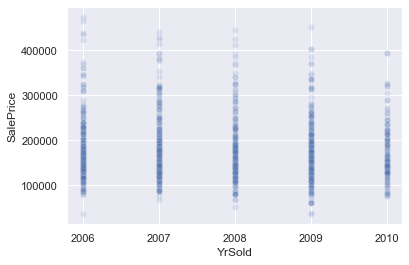

In [23]:
sns.scatterplot(data=df, x='YrSold', y='SalePrice', alpha=0.15)
plt.xticks(np.arange(2006, 2010+1, 1))
;

''

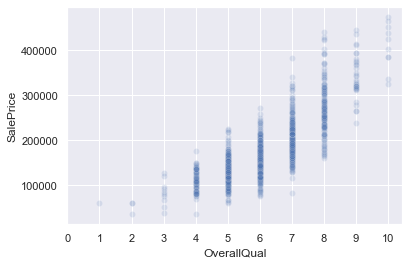

In [24]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice', alpha=0.15)
plt.xticks(np.arange(0, 10+1, 1))
;

We will further investigate the relationship between the sale price ('SalePrice') and the variables 'LotArea', 'GarageArea', and 'OverallQual' by means of heatmaps.

''

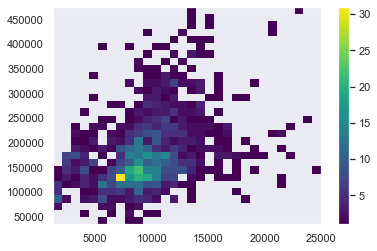

In [25]:
plt.hist2d(data=df, x='LotArea', y='SalePrice', cmap='viridis', bins=30, cmin=1)
plt.colorbar()
;

''

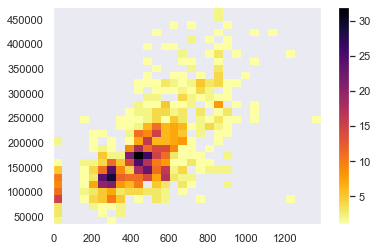

In [26]:
plt.hist2d(data=df, x='GarageArea', y='SalePrice', cmap='inferno_r', bins=30, cmin=1)
plt.colorbar()
;

''

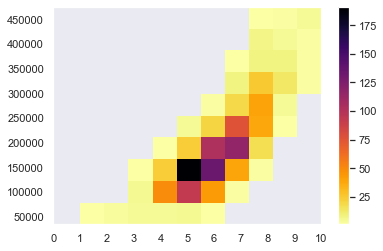

In [27]:
plt.hist2d(data=df, x='OverallQual', y='SalePrice', cmap='inferno_r', bins=10, cmin=1)
plt.xticks(np.arange(0, 10+1, 1))
plt.colorbar()
;

### 3.2.2. Plots Involving Categorical Data

In this part, we are particularly interested in the distribution of prices for every categorical variable.

We will follow a slightly different investigation approach in this part. For every categorical column, we will display a faceted grid of plots in a separate cell.

In [28]:
def bivariate_plot_categorical(col, sharey=True):
    g = sns.FacetGrid(data=df, col=col, col_wrap=2, sharey=sharey)
    g.map(sns.histplot, 'SalePrice')
    g.set(xticks=np.arange(0, 400e3+50e3, 50e3))
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

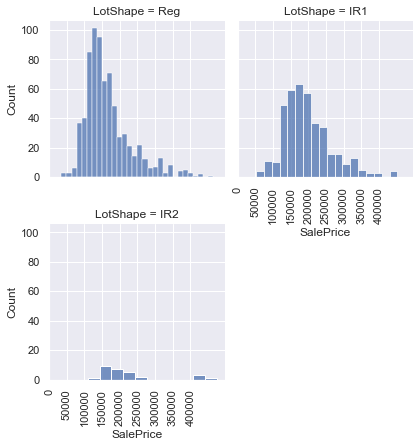

In [29]:
bivariate_plot_categorical(categorical_columns[0])

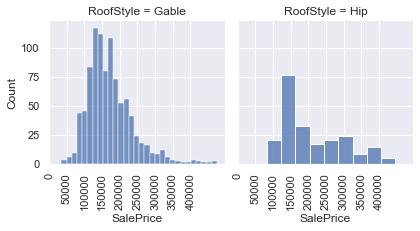

In [30]:
bivariate_plot_categorical(categorical_columns[1])

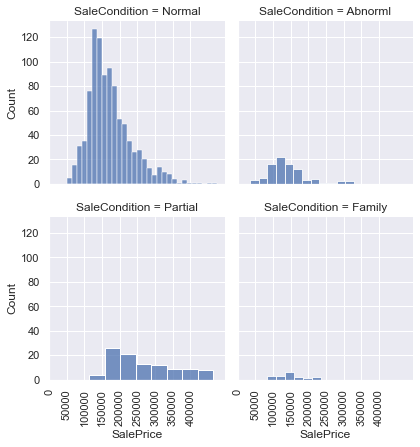

In [31]:
bivariate_plot_categorical(categorical_columns[2])

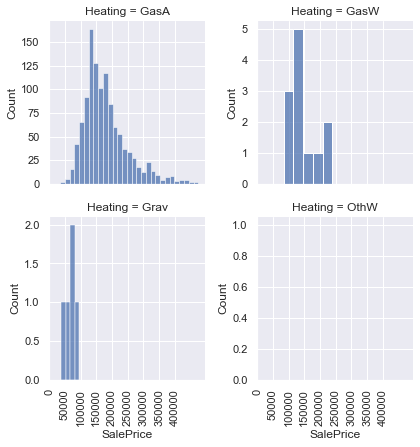

In [32]:
bivariate_plot_categorical(categorical_columns[3], False)

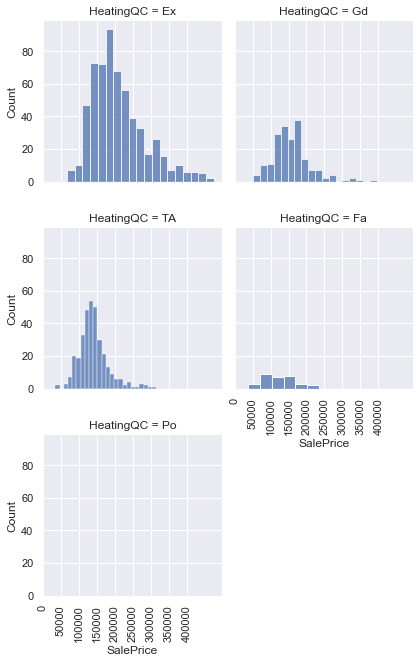

In [33]:
bivariate_plot_categorical(categorical_columns[4])

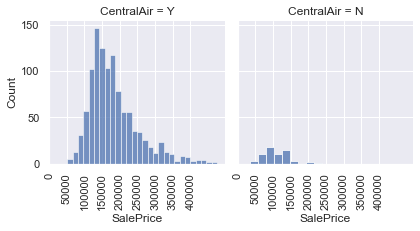

In [34]:
bivariate_plot_categorical(categorical_columns[5])

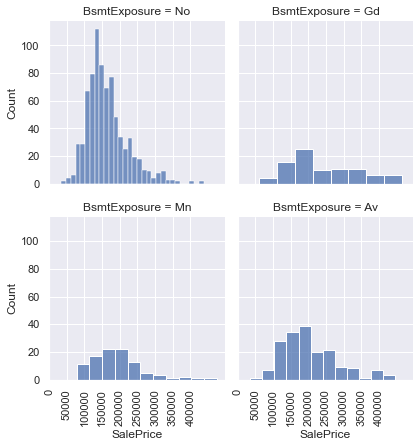

In [35]:
bivariate_plot_categorical(categorical_columns[6])

## 3.3. Multivariate Exploration

''

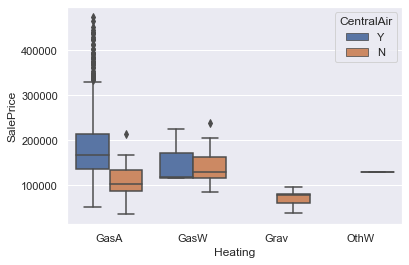

In [36]:
sns.boxplot(data=df, x='Heating', y='SalePrice', hue='CentralAir')
;

''

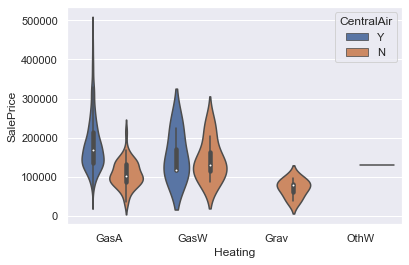

In [37]:
sns.violinplot(data=df, x='Heating', y='SalePrice', hue='CentralAir')
;

''

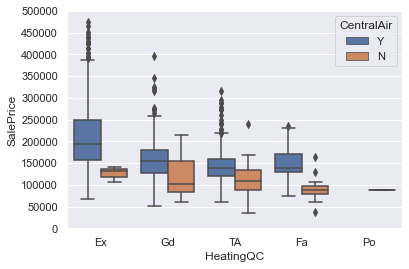

In [38]:
sns.boxplot(data=df, x='HeatingQC', y='SalePrice', hue='CentralAir')
plt.yticks(np.arange(0, 500e3+50e3, 50e3))
;

''

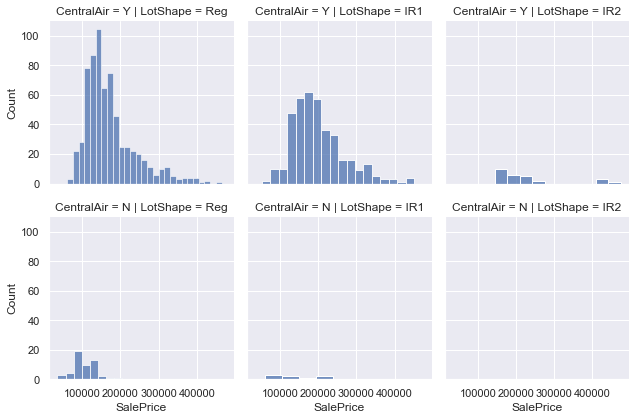

In [39]:
g = sns.FacetGrid(data=df, col='LotShape', row='CentralAir')
g.map(sns.histplot, 'SalePrice')
;

''

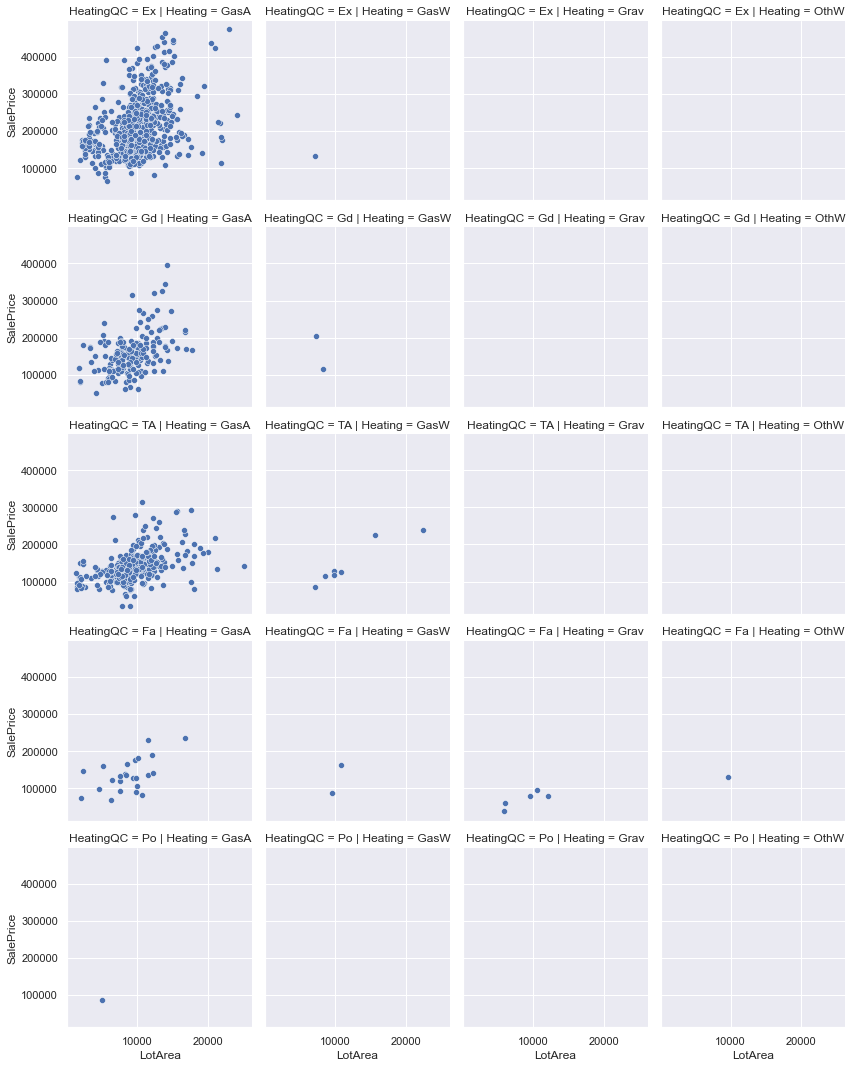

In [40]:
g = sns.FacetGrid(data=df, col='Heating', row='HeatingQC')
g.map(sns.scatterplot, 'LotArea', 'SalePrice')
;

In [41]:
categorical_columns

Index(['LotShape', 'RoofStyle', 'SaleCondition', 'Heating', 'HeatingQC',
       'CentralAir', 'BsmtExposure'],
      dtype='object')

In [42]:
df.LotShape.value_counts()

Reg    732
IR1    394
IR2     28
Name: LotShape, dtype: int64

''

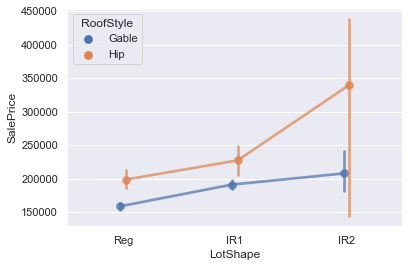

In [43]:
g = sns.pointplot(data=df, x='LotShape', y='SalePrice', hue='RoofStyle', 
              dodge=True, plot_kws=dict(alpha=0.3))
plt.setp(g.collections, alpha=0.7) #for the markers
plt.setp(g.lines, alpha=0.7)       #for the lines
;

# 4. Explanatory Data Analysis

In [48]:
df.describe()

,LotArea,GarageArea,YrSold,OverallQual,SalePrice
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,9432.182842,469.661179,2007.802426,6.132582,178796.374350
std,3530.841118,207.974889,1.326543,1.327772,70532.575623
min,1300.000000,0.000000,2006.000000,1.000000,34900.000000
25%,7536.250000,327.250000,2007.000000,5.000000,131100.000000
50%,9317.000000,474.000000,2008.000000,6.000000,163945.000000
75%,11316.750000,576.000000,2009.000000,7.000000,212000.000000
max,25000.000000,1390.000000,2010.000000,10.000000,475000.000000


### Sale Price Distribution
> We can summarize the findings about house prices distribution in the following points:
> - Range: 34,900 – 475,000
> - Mean: ~178,800
> - Distribution: unimodal, left-skewed

''

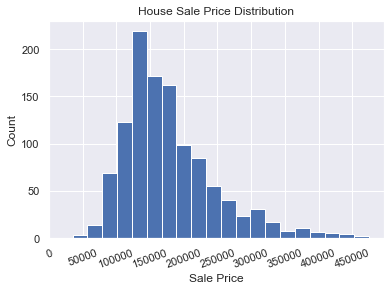

In [47]:
plt.hist(data=df, x='SalePrice', bins=20)
plt.xticks(np.arange(0, 500e3, 50e3), rotation=20)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('House Sale Price Distribution')
;

### Lot Area VS Price
> We can observe from both plots the positive correlation between the lot area and price. The first plot (scatter) shows that as we go upwards through the curve, the points concentrate at the right. The second plot (heatmap) shows ceasing of densities as we go upwards, this is especially true for the left part of the plot.

''

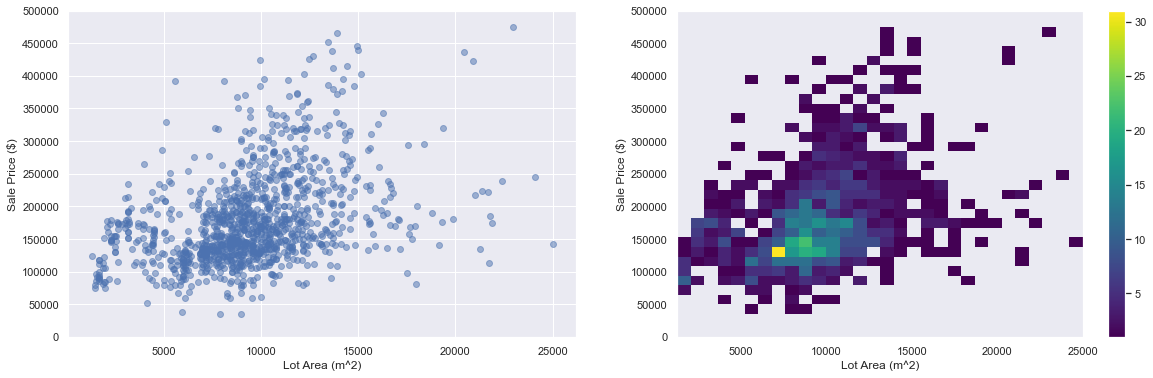

In [63]:
plt.figure(figsize=(20, 6))
plt.title('Lot Area VS Price')

plt.subplot(1, 2, 1)
plt.scatter(data=df, x='LotArea', y='SalePrice', alpha=0.5)
plt.xlabel('Lot Area (m^2)')
plt.ylabel('Sale Price ($)')
plt.yticks(np.arange(0, 500e3+50e3, 50e3))

plt.subplot(1, 2, 2)
plt.hist2d(data=df, x='LotArea', y='SalePrice', cmap='viridis', bins=30, cmin=1)
plt.xlabel('Lot Area (m^2)')
plt.ylabel('Sale Price ($)')
plt.yticks(np.arange(0, 500e3+50e3, 50e3))
plt.colorbar()
;

### Overall Quality of Materials VS Price
> The plot shows a clear positive correlation between the price and overall quality of materials. The range of prices shifts upward as the quality increases.

''

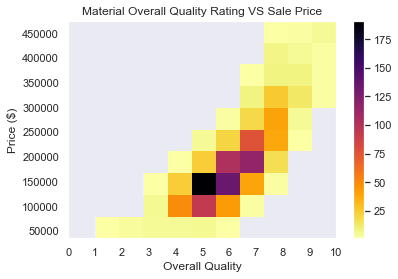

In [62]:
plt.hist2d(data=df, x='OverallQual', y='SalePrice', cmap='inferno_r', bins=10, cmin=1)
plt.xticks(np.arange(0, 10+1, 1))
plt.xlabel('Overall Quality')
plt.ylabel('Price ($)')
plt.title('Material Overall Quality Rating VS Sale Price')
plt.colorbar()
;

### Price with Heatiing Type and Central Air
> From the plot, we can observe the following:
> - Prices are generally higher for Gas-A (Gas forced warm air furnace), then for Gas-W (Gas hot water or steam heat), then for Grav (Gravity furnace).
> - Prices are generally higher for houses with central air conditioning.

''

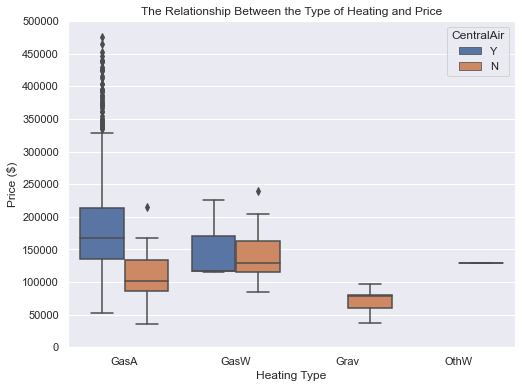

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Heating', y='SalePrice', hue='CentralAir')
plt.xlabel('Heating Type')
plt.yticks(np.arange(0, 500e3+50e3, 50e3))
plt.ylabel('Price ($)')
plt.title('The Relationship Between the Type of Heating and Price')
;

### Price with Heating Quality and Central Air
> From the plot, we can observe the following:
> - Prices are positively correlated with the heating quality
> - Houses with central air conditioning tend to have higher prices

''

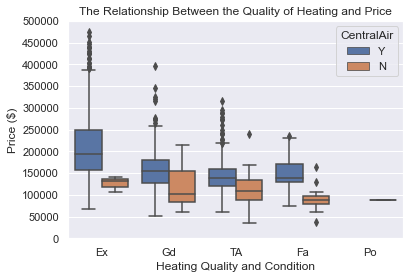

In [72]:
sns.boxplot(data=df, x='HeatingQC', y='SalePrice', hue='CentralAir')
plt.yticks(np.arange(0, 500e3+50e3, 50e3))
plt.xlabel('Heating Quality and Condition')
plt.ylabel('Price ($)')
plt.title('The Relationship Between the Quality of Heating and Price')
;